# Importation des librairies

In [167]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.offline as pyo
import numpy as np
import scipy
from statsmodels.stats import weightstats
import seaborn as sns
from math import exp

# Importation de la base

In [168]:
train = pd.read_csv("D:/Simplon/Brief projet/Titanic/train.csv")

# Nettoyage de la base

In [169]:
train["Age"].fillna(train["Age"].mean(), inplace = True)
del train["Cabin"]
train.dropna(inplace= True)

In [170]:
train_stats = train

In [171]:
del train_stats['Name']
del train_stats['Ticket']

In [172]:
train_stats = pd.get_dummies(train_stats)

In [173]:
train_stats.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


# Régression linéaire

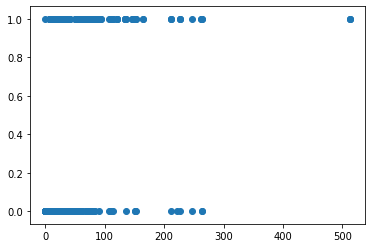

In [174]:
plt.scatter(train.Fare,train.Survived)

0.3022791445884407
[0.00249786]
R² : 0.06517321963316614
RMSE : 0.46988268575919184


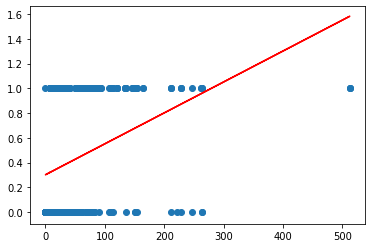

In [175]:
# Les données
x = train_stats['Fare'].values.reshape(-1,1)
y = train_stats['Survived']

# Construction du modèle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
import numpy as np
print(model.intercept_)
print(model.coef_)

#calcul du R²
print("R² :", model.score(x,y))

RMSE=np.sqrt(((y-model.predict(x))**2).sum()/len(y))
print("RMSE :", RMSE)


# Visualisation
plt.scatter(x,y)
plt.plot(x,model.predict(x),c='red')
plt.show()

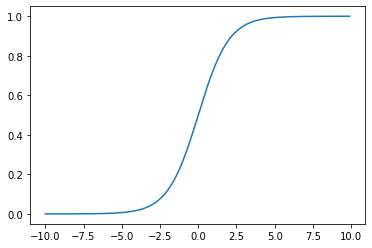

In [176]:
sig = lambda x : 1/(1+exp(-x))

x_values = np.arange(-10,10,0.1)
    
plt.plot(x_values,list(map(sig,x_values)))
plt.show()

# Régression logistique

## Simple

In [177]:
x = train_stats['Fare'].values.reshape(-1,1)
y = train_stats['Survived']

# Modèle de régression logistique
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(solver='lbfgs', multi_class='auto', random_state = 0)
reg_log.fit(x, y)

# Prédictions des probabilités
prob_pred = reg_log.predict_proba(x)

# Prédictions des résultats du Test set
y_pred = reg_log.predict(x)

# Matrice de confusion
from sklearn.metrics import confusion_matrix
#affichage plus "joli" de la matrice de confusion
cm = pd.DataFrame(confusion_matrix(y, y_pred), columns=['prédit ' + str(_) for _ in reg_log.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log.classes_]
cm

,prédit 0,prédit 1
vrai 0,512,37
vrai 1,260,80


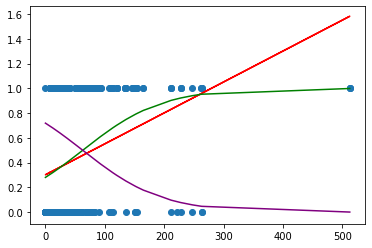

In [178]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),c='red')
plt.plot(sorted(x),reg_log.predict_proba(sorted(x))[:,1],c='green')
plt.plot(sorted(x),reg_log.predict_proba(sorted(x))[:,0],c='purple')
plt.show()

## Multiple

### Création d'un train set et d'un test set

In [179]:
train_stats.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [180]:
from sklearn.model_selection import train_test_split
X = train_stats[['Age','Sex_male', 'Pclass', 'Fare']]
y = train_stats['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

### Entrainement du modèle

In [181]:
train_stats.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


prédit 0  prédit 1
vrai 0       465        84
vrai 1       102       238


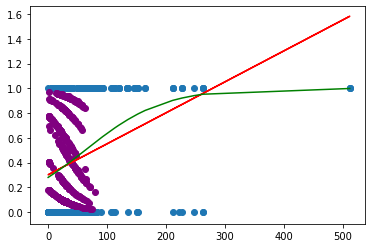

In [182]:
# Modèle de régression logistique sur le training set
from sklearn.linear_model import LogisticRegression
reg_log2 = LogisticRegression(solver='lbfgs', multi_class='auto', penalty ='none', random_state = 0)
reg_log2.fit(X_train, y_train)

# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y, reg_log2.predict(X)), columns=['prédit ' + str(_) for _ in reg_log2.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log2.classes_]
print(cm)

# Visualisation des probabilités prédites
plt.scatter(x,y)
plt.plot(x,model.predict(x),c='red')
plt.plot(sorted(x),reg_log.predict_proba(sorted(x))[:,1],c='green')
plt.scatter(sorted(X.Age),reg_log2.predict_proba(X.sort_values('Age'))[:,1],c='purple')
plt.show()

## Évaluation du modèle

In [183]:
#affichage plus "joli" de la matrice de confusion
cm = pd.DataFrame(cm, columns=['prédit ' + str(_) for _ in reg_log2.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log2.classes_]
cm

,prédit 0,prédit 1
vrai 0,465,84
vrai 1,102,238


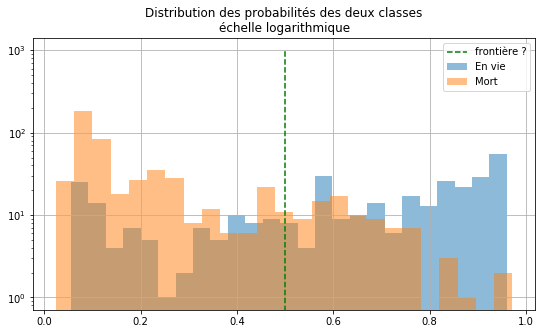

In [184]:
proba_1 = reg_log2.predict_proba(X)[:, 1]
pr = pd.DataFrame(proba_1, columns=['proba'])
pr['Survived'] = y.values

fig, ax = plt.subplots(1,1,figsize=(9,5))

pr[pr.Survived == 1]['proba'].hist(bins=25, label='En vie', alpha=0.5, ax=ax)
pr[pr.Survived == 0]['proba'].hist(bins=25, label='Mort', alpha=0.5, ax=ax)
ax.plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax.set_yscale('log') #l'échelle logarithmique permet de mieux voir les probabilités qui sont faibles
ax.set_title('Distribution des probabilités des deux classes\néchelle logarithmique')
ax.legend()

### Courbe ROC et AUC

In [185]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = reg_log2.predict_proba(X)
fpr0, tpr0, thresholds0 = roc_curve(y, proba[:, 0], pos_label=reg_log2.classes_[0], drop_intermediate=False)
thresholds0.shape

(750,)

In [186]:
tp = pd.DataFrame(dict(fpr=fpr0, tpr=tpr0, threshold=thresholds0))
tp.head()
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2

Text(0.5, 1.0, 'Evolution de FPR, TPR\nen fonction du seuil au delà duquel\nla réponse du classifieur est validée')

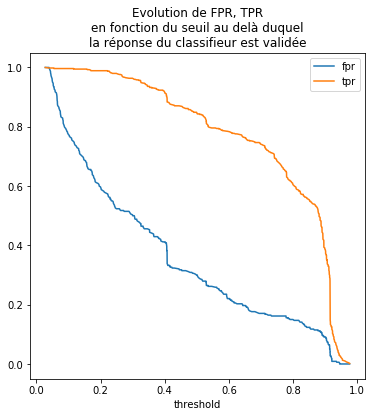

In [187]:
ax = tp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(6,6))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée")

Text(0.5, 1.0, 'Evolution de FPR, TPR\nen fonction du seuil au delà duquel\nla réponse du classifieur est validée')

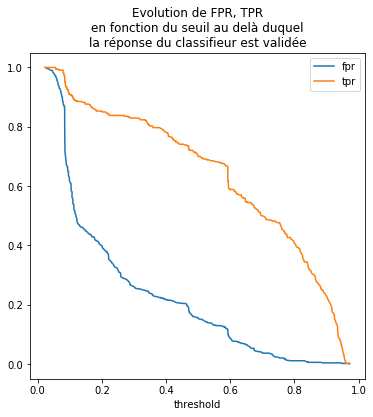

In [188]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = reg_log2.predict_proba(X)
fpr1, tpr1, thresholds1 = roc_curve(y, proba[:, 1], pos_label=reg_log2.classes_[1], drop_intermediate=False)

tp = pd.DataFrame(dict(fpr=fpr1, tpr=tpr1, threshold=thresholds1))
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2

ax = tp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(6,6))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée")

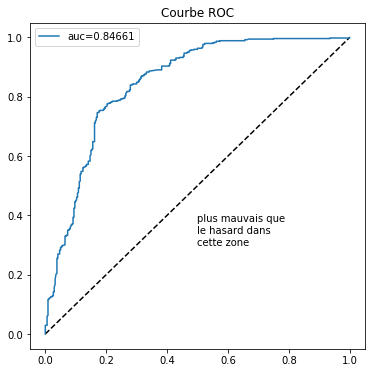

In [189]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend()

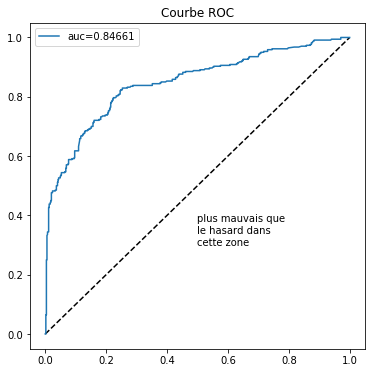

In [190]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr1, tpr1)
ax.plot(fpr1, tpr1, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend()

Text(0.5, 1.0, 'Evolution de la précision et du rappel\nen fonction du seuil au delà duquel\nla réponse du classifieur est validée')

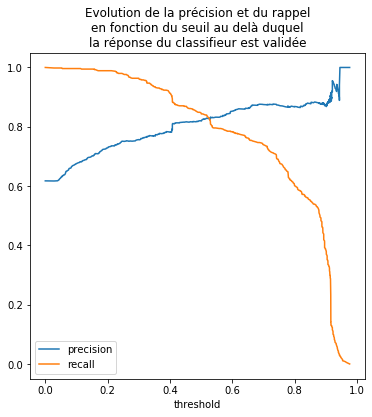

In [191]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y, proba[:, 0], pos_label=reg_log2.classes_[0])

pr = pd.DataFrame(dict(precision=precision, recall=recall, 
                             threshold=[0] + list(thresholds)))

ax = pr.plot(x="threshold", y=['precision', 'recall'], figsize=(6,6))
ax.set_title("Evolution de la précision et du rappel\nen fonction du seuil au delà duquel\n" + 
             "la réponse du classifieur est validée")

### Interprétation des coefficients

In [192]:
### Affichage des coefficients obtenus avec sklearn sous forme d'un dataframe
coef = pd.DataFrame(np.concatenate([reg_log2.intercept_.reshape(-1,1), reg_log2.coef_],axis=1),
             index = ["Coefficients"],
             columns = ["constante"]+list(X.columns)).T

# Calcul de l'exponentiel pour avoir les odds-ratio
coef["OR"] = np.exp(coef.Coefficients)
coef

,Coefficients,OR
constante,4.643075,103.863234
Age,-0.030089,0.970359
Sex_male,-2.758502,0.063387
Pclass,-1.126766,0.324080
Fare,0.000610,1.000610


In [193]:
### Construction du même modèle avec statsmodels
import statsmodels.api as sm
X = sm.add_constant(X) #rappel: par défaut statsmodel ne met pas de constante dans les modèles
reg_log3 = sm.Logit(y, X)
res = reg_log3.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.452557
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            4
Date:                Thu, 09 Apr 2020   Pseudo R-squ.:                  0.3197
Time:                        12:15:36   Log-Likelihood:                -402.32
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.445e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6589      0.509      9.157      0.000       3.662       5.656
Age           -0.0335      0.007     -4.528      0.000      -0.048      -0.019
Sex_male      -2.6000      0.188    -13.866      0.000      -2.967      -2.232
Pclass        -1.1473      0.135     -8.484      0.000      -1.412      -0.882
Fare           0.0006      0.002      0.277      0.782      -0.003       0.005
==============================================================================
"""

In [194]:
#Comparaison avec le modèle où on remplace Female par Male

X = train_stats[['Age','Sex_male', 'Pclass', 'Fare']]
y = train_stats['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

X = sm.add_constant(X)
reg_log4 = sm.Logit(y, X)
res = reg_log4.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.452557
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            4
Date:                Thu, 09 Apr 2020   Pseudo R-squ.:                  0.3197
Time:                        12:15:36   Log-Likelihood:                -402.32
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.445e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6589      0.509      9.157      0.000       3.662       5.656
Age           -0.0335      0.007     -4.528      0.000      -0.048      -0.019
Sex_male      -2.6000      0.188    -13.866      0.000      -2.967      -2.232
Pclass        -1.1473      0.135     -8.484      0.000      -1.412      -0.882
Fare           0.0006      0.002      0.277      0.782      -0.003       0.005
==============================================================================
"""

In [195]:
np.exp(res.params)

const       105.520623
Age           0.967075
Sex_male      0.074277
Pclass        0.317496
Fare          1.000564
dtype: float64